## QUARTERLY

In [204]:
library(tidyverse)
library(gridExtra) # Arrangning ggplots
library(readr)     # Loasing data
library(forecast)  
library(repr)      # Resizing the plots in jupyter
library(rugarch)   # For ARCH and GARCH models
library(dynlm)     # Lagged linear models
library(urca)      # Dick Fuller test
library(car)       # Linear hyphothesis testing
library(readxl)    # Loading excel
library(tseries)   # adf-test
library(vars)      # VAR models
library(lmtest)    # Granger causality tests

options(repr.plot.width=8, repr.plot.height=2.5)

setwd("C:/Users/larsn/Documents/GitHub/Applied-Econometric-Time-Series-WE")

library(readxl)
quarterly <- read_excel("Data/quarterly.xls")
quarterly$date <- as.Date(as.yearqtr(quarterly$DATE, format = "%YQ%q"))
head(quarterly)

DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,date
1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830,1960-01-01
1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,1960-04-01
1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,1960-07-01
1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624,1960-10-01
1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073,1961-01-01
1961Q2,1.73,2.30,2.94,3.62,3.79,31.47,33.33,29.83,19.23,141.40,966.4,320.97,7.00,23.00,2869.6,2962.9,18.785,32.131,1961-04-01


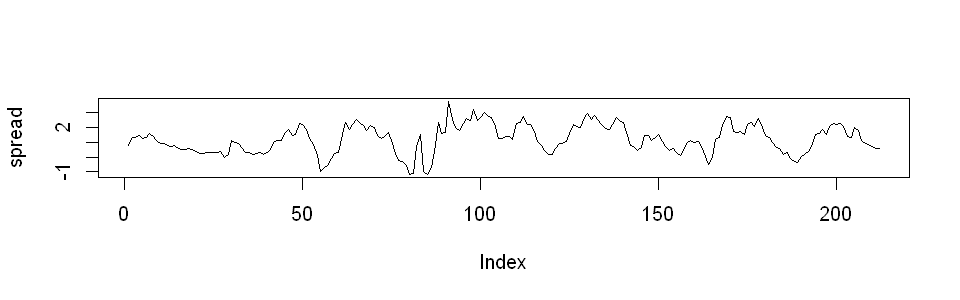

In [74]:
spread <- quarterly$r5 - quarterly$Tbill
plot(spread, type="l")

In [75]:
model <- arima(spread, order = c(2,0,0))
model


Call:
arima(x = spread, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.0407  -0.2157     1.1928
s.e.  0.0669   0.0670     0.1846

sigma^2 estimated as 0.2284:  log likelihood = -145.01,  aic = 298.02

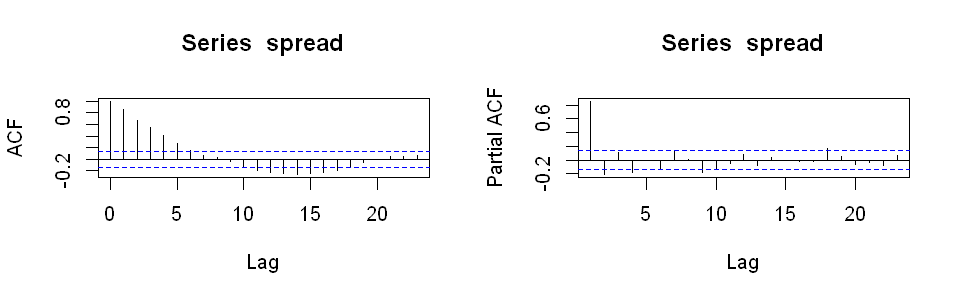

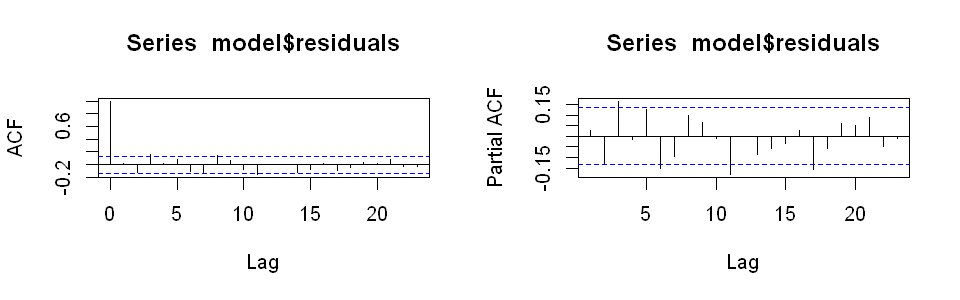

In [76]:
par(mfrow=c(1,2))
acf(spread)
pacf(spread)

par(mfrow=c(1,2))
acf(model$residuals)
pacf(model$residuals)

In [77]:
Box.test(model$residuals, lag=4,type="Ljung-Box")
Box.test(model$residuals, lag=8,type="Ljung-Box")
Box.test(model$residuals, lag=12,type="Ljung-Box")


	Box-Ljung test

data:  model$residuals
X-squared = 8.8824, df = 4, p-value = 0.06411



	Box-Ljung test

data:  model$residuals
X-squared = 21.596, df = 8, p-value = 0.005721



	Box-Ljung test

data:  model$residuals
X-squared = 29.127, df = 12, p-value = 0.003773


In [78]:
auto.arima(spread)
arima(spread, order = c(1,0,4), fixed=c(NA,NA,0,NA,0,NA))
arima(spread, order = c(2,0,7), fixed=c(NA,NA,NA,0,0,0,0,0,NA,0))

Series: spread 
ARIMA(1,0,4) with non-zero mean 

Coefficients:
         ar1     ma1     ma2     ma3     ma4    mean
      0.6861  0.4037  0.0046  0.2591  0.1378  1.1933
s.e.  0.1094  0.1188  0.1169  0.1240  0.1006  0.1803

sigma^2 estimated as 0.2206:  log likelihood=-138.41
AIC=290.82   AICc=291.37   BIC=314.32


Call:
arima(x = spread, order = c(1, 0, 4), fixed = c(NA, NA, 0, NA, 0, NA))

Coefficients:
         ar1     ma1  ma2     ma3  ma4  intercept
      0.7368  0.3679    0  0.1500    0     1.1928
s.e.  0.0519  0.0753    0  0.0625    0     0.1818

sigma^2 estimated as 0.2172:  log likelihood = -139.77,  aic = 289.55


Call:
arima(x = spread, order = c(2, 0, 7), fixed = c(NA, NA, NA, 0, 0, 0, 0, 0, NA, 
    0))

Coefficients:
         ar1     ar2     ma1  ma2  ma3  ma4  ma5  ma6      ma7  intercept
      0.3942  0.5106  0.8086    0    0    0    0    0  -0.1370          0
s.e.  0.1177  0.1148  0.0849    0    0    0    0    0   0.0382          0

sigma^2 estimated as 0.2204:  log likelihood = -141.96,  aic = 293.92

In [79]:
a <- arima(spread, order=c(2,0,1))

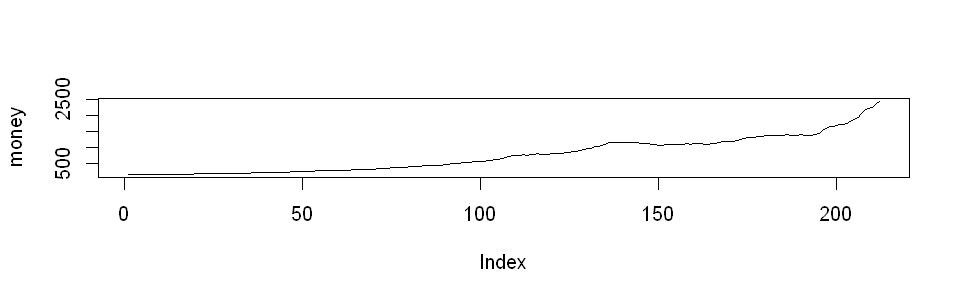

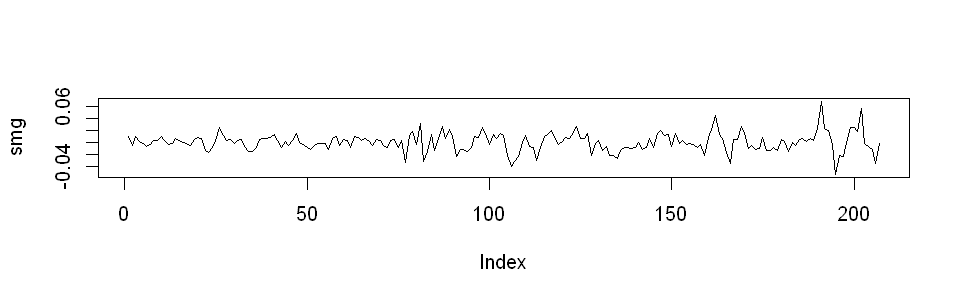

In [80]:
money <- quarterly$M1NSA
smg <- diff(diff(log(quarterly$M1NSA),4))
plot(money, type="l")
plot(smg, type="l")

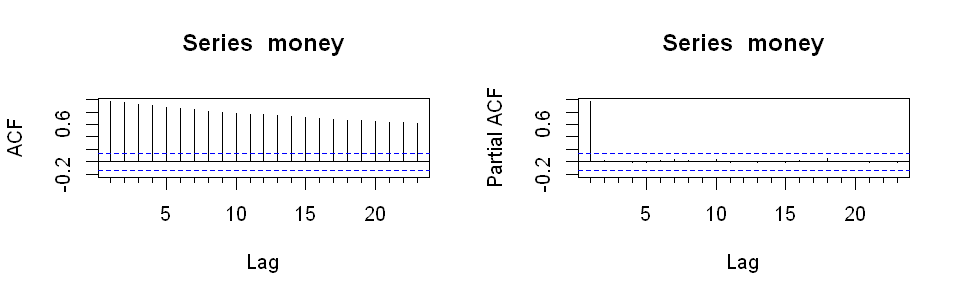

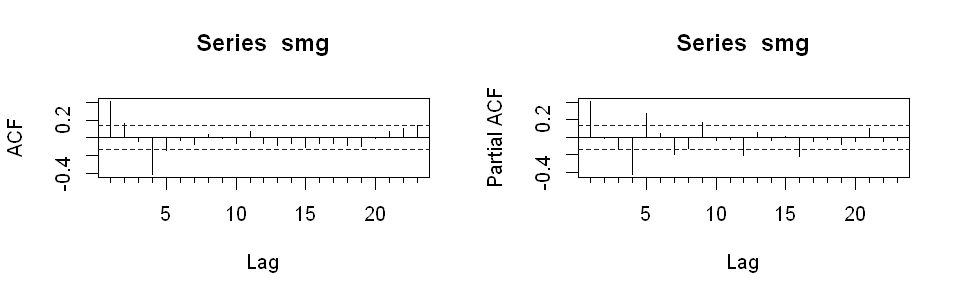

In [81]:
par(mfrow=c(1,2))
Acf(money)
Pacf(money)

par(mfrow=c(1,2))
Acf(smg)
Pacf(smg)

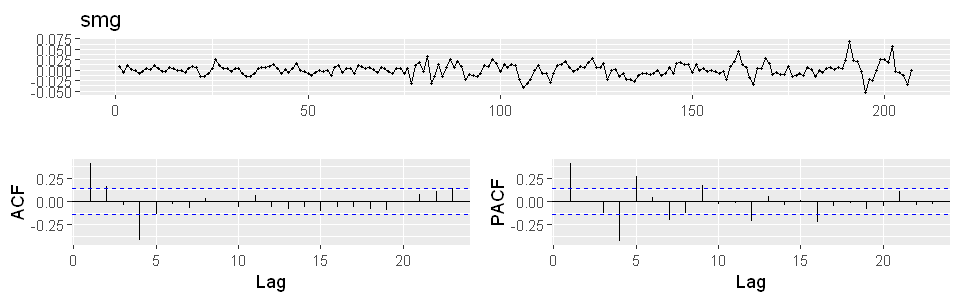

In [82]:
ggtsdisplay(smg)


In [83]:
smg <- diff(diff(log(quarterly$M1NSA),4))

money_m1 <- arima(smg, order = c(1,0,4), fixed=c(NA,0,0,0,NA,0))
money_m1

money_m2 <- arima(log(money), order = c(1,1,0), seasonal=list(order=c(0,1,1), period = 4))
money_m2


Call:
arima(x = smg, order = c(1, 0, 4), fixed = c(NA, 0, 0, 0, NA, 0))

Coefficients:
         ar1  ma1  ma2  ma3      ma4  intercept
      0.5493    0    0    0  -0.7566          0
s.e.  0.0594    0    0    0   0.0520          0

sigma^2 estimated as 0.0001251:  log likelihood = 634.56,  aic = -1263.13


Call:
arima(x = log(money), order = c(1, 1, 0), seasonal = list(order = c(0, 1, 1), 
    period = 4))

Coefficients:
         ar1     sma1
      0.5493  -0.7566
s.e.  0.0594   0.0520

sigma^2 estimated as 0.0001251:  log likelihood = 634.56,  aic = -1263.13

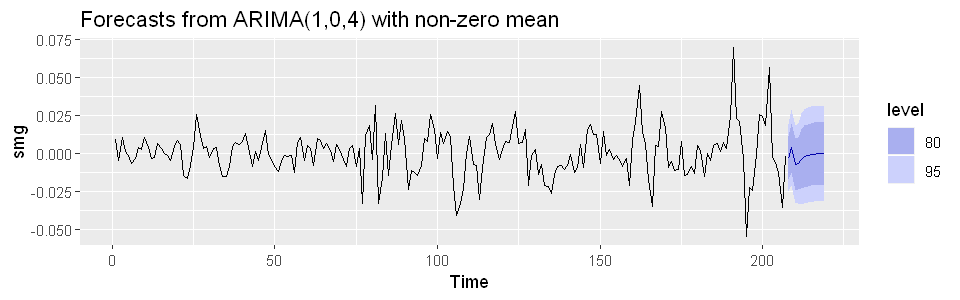

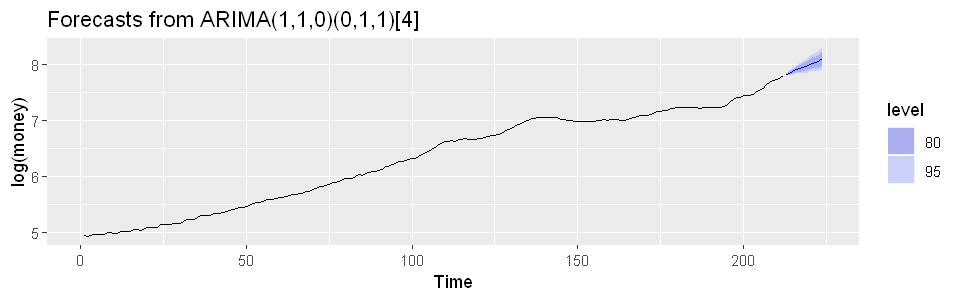

In [84]:
autoplot(forecast(money_m1, h=12))
autoplot(forecast(money_m2, h=12))

In [85]:
money_spec <- arfimaspec(mean.model = list(armaOrder = c(4,4), include.mean = TRUE),
                         fixed.pars = list(ar2 = 0, ar3 = 0, ar4 = 0, ma1 = 0, ma2 = 0, ma3 = 0))

money_m1 <- arfimafit(spec = money_spec, data = smg, solver = "nlminb")
money_m1


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(4,0,4)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu     0.000475    0.000437   1.0869  0.27707
ar1    0.549891    0.059570   9.2309  0.00000
ar2    0.000000          NA       NA       NA
ar3    0.000000          NA       NA       NA
ar4    0.000000          NA       NA       NA
ma1    0.000000          NA       NA       NA
ma2    0.000000          NA       NA       NA
ma3    0.000000          NA       NA       NA
ma4   -0.756672    0.048199 -15.6989  0.00000
sigma  0.011195    0.000550  20.3470  0.00000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu     0.000475    0.000459   1.0358  0.30031
ar1    0.549891    0.072532   7.5814  0.00000
ar2    0.000000          NA       NA       NA
ar3    0.000000          NA       NA       NA
ar4    0.000000       

In [86]:

arima(diff(log(money),1), order=c(2,0,0), include.mean=F)
arima(money, order=c(2,1,0), include.mean=F)



Call:
arima(x = diff(log(money), 1), order = c(2, 0, 0), include.mean = F)

Coefficients:
         ar1     ar2
      0.3159  0.4123
s.e.  0.0630  0.0632

sigma^2 estimated as 0.0002755:  log likelihood = 565.02,  aic = -1124.05


Call:
arima(x = money, order = c(2, 1, 0), include.mean = F)

Coefficients:
         ar1     ar2
      0.3762  0.5031
s.e.  0.0615  0.0628

sigma^2 estimated as 238.8:  log likelihood = -877.79,  aic = 1761.58

# Chapter 3 GARCH modeling

In [87]:
m1 <- arima(spread, order = c(2,0,7), fixed=c(NA,NA,NA,0,0,0,0,0,NA,NA))
m1


Call:
arima(x = spread, order = c(2, 0, 7), fixed = c(NA, NA, NA, 0, 0, 0, 0, 0, NA, 
    NA))

Coefficients:
         ar1     ar2     ma1  ma2  ma3  ma4  ma5  ma6      ma7  intercept
      0.3381  0.4006  0.7846    0    0    0    0    0  -0.1390     1.1922
s.e.  0.1229  0.1160  0.0913    0    0    0    0    0   0.0396     0.1935

sigma^2 estimated as 0.208:  log likelihood = -135.38,  aic = 282.76

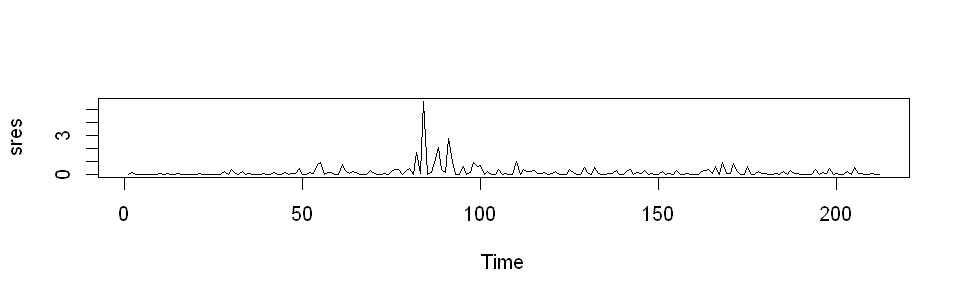

In [88]:
sres <- m1$residuals^2
plot(sres, type="l")

In [89]:
summary(dynlm(sres ~ L(sres,1) + L(sres,2) +L(sres,3) +L(sres,4) +L(sres,5) +L(sres,6) +L(sres,7)))


Time series regression with "ts" data:
Start = 8, End = 212

Call:
dynlm(formula = sres ~ L(sres, 1) + L(sres, 2) + L(sres, 3) + 
    L(sres, 4) + L(sres, 5) + L(sres, 6) + L(sres, 7))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2383 -0.1382 -0.0728  0.0536  5.0624 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.07352    0.04083   1.801 0.073297 .  
L(sres, 1)  -0.02164    0.06787  -0.319 0.750229    
L(sres, 2)   0.14098    0.06757   2.086 0.038222 *  
L(sres, 3)   0.09386    0.06828   1.375 0.170767    
L(sres, 4)   0.25641    0.06613   3.877 0.000144 ***
L(sres, 5)  -0.02821    0.06828  -0.413 0.679990    
L(sres, 6)  -0.09149    0.06757  -1.354 0.177270    
L(sres, 7)   0.30453    0.06786   4.488 1.22e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4507 on 197 degrees of freedom
Multiple R-squared:  0.2344,	Adjusted R-squared:  0.2072 
F-statistic: 8.614 on 7 and 197 DF,  p-value

In [90]:
spec = ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(1,1)),
                  mean.model=list(armaOrder=c(2,7), 
                                  include.mean=T), 
                  distribution.model="sstd",
                  fixed.pars=list(ma2=0, ma3=0, ma4=0, ma5=0, ma6=0))

m2 <- ugarchfit(spec = spec, data = spread)
m2


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(2,0,7)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      1.039515    0.172068  6.04129 0.000000
ar1     0.649862    0.227560  2.85578 0.004293
ar2     0.182684    0.214335  0.85233 0.394031
ma1     0.523545    0.209998  2.49310 0.012663
ma2     0.000000          NA       NA       NA
ma3     0.000000          NA       NA       NA
ma4     0.000000          NA       NA       NA
ma5     0.000000          NA       NA       NA
ma6     0.000000          NA       NA       NA
ma7    -0.086772    0.051726 -1.67754 0.093437
omega   0.016423    0.013815  1.18884 0.234503
alpha1  0.238232    0.131937  1.80566 0.070972
beta1   0.760768    0.097632  7.79222 0.000000
skew    1.177459    0.098585 11.9


Autocorrelations of series 'a', by lag

     0      1      2      3      4      5      6      7      8 
 1.000 -0.105  0.166 -0.007  0.065 -0.020 -0.009  0.113 -0.021 

spread,x
0.77,1
1.31,2
1.31,3
1.44,4
1.29,5
1.32,6


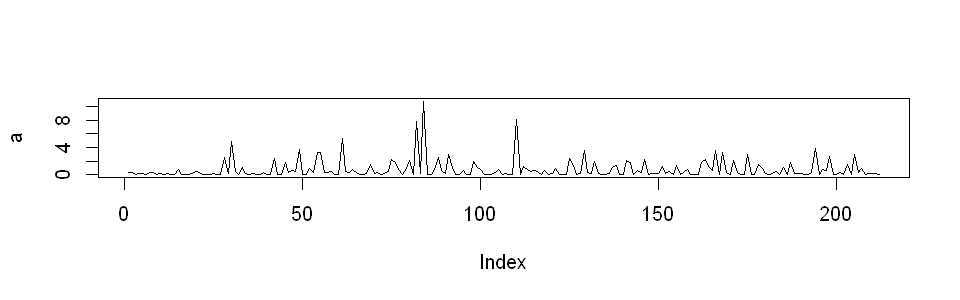

In [183]:
a <- m2@fit[["residuals"]]^2/(m2@fit[["var"]])
plot(a, type="l")
acf(a, plot=F, lag=8)
head(df)

# Chapter 4 - Dickie Fuller test

In [92]:
acf(spread, plot=F)


Autocorrelations of series 'spread', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.856  0.677  0.549  0.410  0.279  0.149  0.071  0.040 -0.032 -0.127 
    11     12     13     14     15     16     17     18     19     20     21 
-0.198 -0.221 -0.243 -0.263 -0.251 -0.219 -0.186 -0.127 -0.055  0.004  0.045 
    22     23 
 0.057  0.075 

In [93]:
spread <- as.ts(spread)
dspread <- diff(spread)

summary(dynlm(dspread ~ L(spread,1) + L(dspread,1) + L(dspread,2) + L(dspread,3) + L(dspread,4) + L(dspread,5) + L(dspread,6) + L(dspread,7) + L(dspread,8)))


Time series regression with "ts" data:
Start = 10, End = 212

Call:
dynlm(formula = dspread ~ L(spread, 1) + L(dspread, 1) + L(dspread, 
    2) + L(dspread, 3) + L(dspread, 4) + L(dspread, 5) + L(dspread, 
    6) + L(dspread, 7) + L(dspread, 8))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34150 -0.24780 -0.05378  0.23118  1.66768 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.25496    0.06746   3.779 0.000209 ***
L(spread, 1)  -0.21134    0.04841  -4.366 2.06e-05 ***
L(dspread, 1)  0.32405    0.07458   4.345 2.25e-05 ***
L(dspread, 2) -0.10036    0.07619  -1.317 0.189353    
L(dspread, 3)  0.23953    0.07371   3.250 0.001364 ** 
L(dspread, 4) -0.01394    0.07557  -0.184 0.853838    
L(dspread, 5)  0.14815    0.07381   2.007 0.046113 *  
L(dspread, 6) -0.07464    0.07462  -1.000 0.318422    
L(dspread, 7) -0.02631    0.07145  -0.368 0.713144    
L(dspread, 8)  0.17974    0.07105   2.530 0.012206 *  
---
Signif. codes:  0 '***' 0

In [94]:
unrest <- dynlm(dspread ~ L(spread,1) + L(dspread,1) + L(dspread,2) + L(dspread,3) + L(dspread,4) + L(dspread,5) + L(dspread,6) + L(dspread,7) + L(dspread,8))
unrest <- sum(unrest$residuals^2)
rest <- dynlm(dspread ~ L(dspread,1) + L(dspread,2) + L(dspread,3) + L(dspread,4) + L(dspread,5) + L(dspread,6) + L(dspread,7) + L(dspread,8) + 0)
rest <- sum(rest$residuals^2)

((rest - unrest)/2)/(unrest/(length(spread)-8))

[1] 10.07529

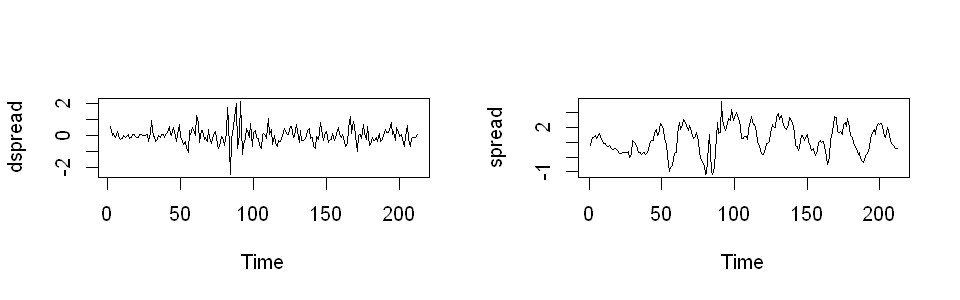

In [95]:
par(mfrow=c(1,2))
plot(dspread, type="l")
plot(spread, type="l")

In [96]:
b <- length(spread)
a <- (c(1:b))
a <- as.ts(a)

reg <- dynlm(dspread ~ a + L(spread,1) + L(dspread,1) + L(dspread,2) + L(dspread,3) + L(dspread,4) + L(dspread,5) + L(dspread,6) + L(dspread,7) + L(dspread,8))
summary(reg)


Time series regression with "ts" data:
Start = 10, End = 212

Call:
dynlm(formula = dspread ~ a + L(spread, 1) + L(dspread, 1) + 
    L(dspread, 2) + L(dspread, 3) + L(dspread, 4) + L(dspread, 
    5) + L(dspread, 6) + L(dspread, 7) + L(dspread, 8))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33066 -0.22210 -0.06503  0.21467  1.66108 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.1985579  0.0824589   2.408 0.016988 *  
a              0.0006944  0.0005851   1.187 0.236733    
L(spread, 1)  -0.2283270  0.0504310  -4.528 1.05e-05 ***
L(dspread, 1)  0.3350912  0.0750751   4.463 1.37e-05 ***
L(dspread, 2) -0.0890205  0.0767093  -1.160 0.247289    
L(dspread, 3)  0.2479751  0.0739761   3.352 0.000966 ***
L(dspread, 4) -0.0042222  0.0759322  -0.056 0.955714    
L(dspread, 5)  0.1554743  0.0739858   2.101 0.036910 *  
L(dspread, 6) -0.0662748  0.0748733  -0.885 0.377178    
L(dspread, 7) -0.0214943  0.0714943  -0.301 0.764012    
L(d

In [97]:
summary(ur.df(y = spread, type = c("trend"), lags = 8, selectlags = "Fixed"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33066 -0.22210 -0.06503  0.21467  1.66108 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1992523  0.0821231   2.426 0.016179 *  
z.lag.1     -0.2283270  0.0504310  -4.528 1.05e-05 ***
tt           0.0006944  0.0005851   1.187 0.236733    
z.diff.lag1  0.3350912  0.0750751   4.463 1.37e-05 ***
z.diff.lag2 -0.0890205  0.0767093  -1.160 0.247289    
z.diff.lag3  0.2479751  0.0739761   3.352 0.000966 ***
z.diff.lag4 -0.0042222  0.0759322  -0.056 0.955714    
z.diff.lag5  0.1554743  0.0739858   2.101 0.036910 *  
z.diff.lag6 -0.0662748  0.0748733  -0.885 0.377178    
z.diff.lag7 -0.0214943  0.0714943  -0.301 0.764012    
z.diff.lag8  0.1868831  0.0712246   2.624 0

In [98]:
linearHypothesis(reg, c("L(spread, 1) = 0", 
                        "a = 0",
                        "L(dspread, 1) = 0",
                        "L(dspread, 2) = 0",
                        "L(dspread, 3) = 0",
                        "L(dspread, 4) = 0",
                        "L(dspread, 5) = 0",
                        "L(dspread, 6) = 0",
                        "L(dspread, 7) = 0",
                        "L(dspread, 8) = 0")
                 ,test="F")

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
202,54.10507,NA,NA,NA,NA
192,42.10411,10,12.00096,5.47259,3.860136e-07


In [99]:
linearHypothesis(reg, 
                 "a = 0",
                 test="F")

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
193,42.41303,NA,NA,NA,NA
192,42.10411,1,0.3089247,1.408735,0.2367329


## Chapter 5: VAR models

### Excercise 9

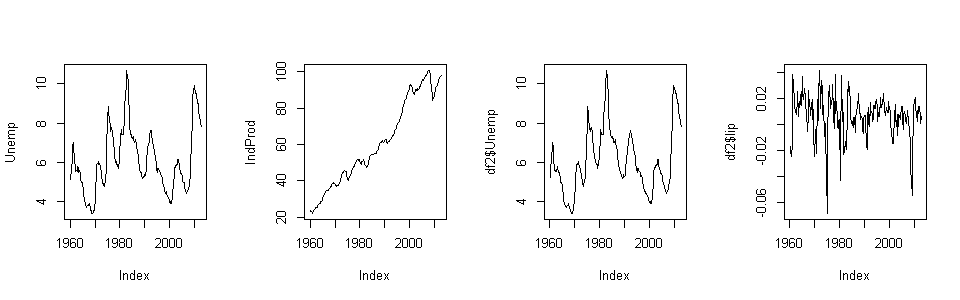

In [242]:
library(zoo)
date <- quarterly$date
Unemp <- quarterly$Unemp
IndProd <- quarterly$IndProd
df <- data.frame(Unemp, IndProd, date)

Unemp <- with(df, zoo(Unemp, date))
IndProd <- with(df, zoo(IndProd, date))

df <- merge(Unemp, IndProd)

par(mfrow=c(1,4))
plot(Unemp, type="l")
plot(IndProd, type="l")

df2 <- df[-1,]
df2$ur <- diff(log(df$Unemp))
df2$lip <- diff(log(df$IndProd))

plot(df2$Unemp, type="l")
plot(df2$lip, type="l")

In [248]:
df3 <- df2[,-c(1,2)]

In [249]:
m <- VAR(df3, p = 9, type = "const")
summary(m)


VAR Estimation Results:
Endogenous variables: ur, lip 
Deterministic variables: const 
Sample size: 202 
Log Likelihood: 1081.566 
Roots of the characteristic polynomial:
0.8992 0.8992 0.8714 0.8714 0.856 0.856 0.8506 0.8506 0.8373 0.8373 0.8082 0.8082 0.8028 0.7867 0.7867 0.7582 0.7582 0.3848
Call:
VAR(y = df3, p = 9, type = "const")


Estimation results for equation ur: 
ur = ur.l1 + lip.l1 + ur.l2 + lip.l2 + ur.l3 + lip.l3 + ur.l4 + lip.l4 + ur.l5 + lip.l5 + ur.l6 + lip.l6 + ur.l7 + lip.l7 + ur.l8 + lip.l8 + ur.l9 + lip.l9 + const 

        Estimate Std. Error t value Pr(>|t|)    
ur.l1   0.467108   0.103821   4.499 1.21e-05 ***
lip.l1 -0.807475   0.318805  -2.533  0.01215 *  
ur.l2   0.192723   0.106396   1.811  0.07172 .  
lip.l2  0.638180   0.330480   1.931  0.05502 .  
ur.l3   0.057582   0.103079   0.559  0.57711    
lip.l3 -0.142127   0.325719  -0.436  0.66310    
ur.l4  -0.215058   0.102696  -2.094  0.03763 *  
lip.l4 -0.137387   0.328389  -0.418  0.67617    
ur.l5   0.094250

In [231]:
print(VARselect(df2, lag.max=12, type="const")[["selection"]])

AIC(n)  HQ(n)  SC(n) FPE(n) 
    10      1      1     10 


### Excercise 11

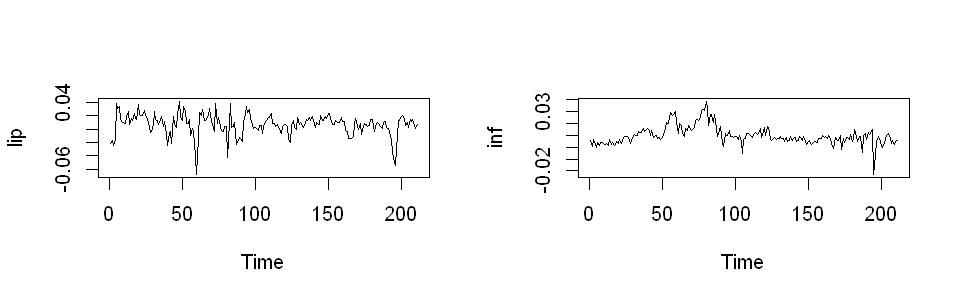

In [186]:
lip <- as.ts(diff(log(quarterly$IndProd)))
inf <- as.ts(diff(log(quarterly$CPI)))

data <- ts.union(lip,inf)

par(mfrow=c(1,2))
plot(lip, type="l")
plot(inf, type="l")

Test wether they are stationary, we find that production is stationary and inflation isn't

In [152]:
adf.test(lip)
adf.test(inf)

Warning message in adf.test(lip):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  lip
Dickey-Fuller = -5.468, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  inf
Dickey-Fuller = -2.9091, Lag order = 5, p-value = 0.1949
alternative hypothesis: stationary


We test the lag length and choose the 3 lags that the BIC model shows (HQ)

In [153]:
print(VARselect(data, lag.max=8, type="const")[["selection"]])

AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      3      3      5 


We test for granger causality, and find that they both cause eachother

In [154]:
grangertest(lip ~ inf, order=3)
grangertest(inf ~ lip, order=3)

Res.Df,Df,F,Pr(>F)
201,NA,NA,NA
204,-3,4.819085,0.002911368


Res.Df,Df,F,Pr(>F)
201,NA,NA,NA
204,-3,5.104971,0.001999622


The Choleski decomposition is found with the fevd() command, and we see how they affect eachother. The function does the following:

*Computes the forecast error variance decomposition of a VAR(p) for n.ahead steps.*

In [155]:
m <- VAR(data, p = 3, type = "const")
fevd(m)

$lip
            lip         inf
 [1,] 1.0000000 0.000000000
 [2,] 0.9948729 0.005127074
 [3,] 0.9914523 0.008547660
 [4,] 0.9746892 0.025310771
 [5,] 0.9508489 0.049151067
 [6,] 0.9358435 0.064156502
 [7,] 0.9228408 0.077159175
 [8,] 0.9104460 0.089553980
 [9,] 0.9011853 0.098814690
[10,] 0.8940685 0.105931489

$inf
             lip       inf
 [1,] 0.01689170 0.9831083
 [2,] 0.09020054 0.9097995
 [3,] 0.10870279 0.8912972
 [4,] 0.11212667 0.8878733
 [5,] 0.12933060 0.8706694
 [6,] 0.14151574 0.8584843
 [7,] 0.14729840 0.8527016
 [8,] 0.15307262 0.8469274
 [9,] 0.15794753 0.8420525
[10,] 0.16112302 0.8388770


Now to verify how shocks in the variables affect each other, we can see this in the IRF graphs

We see that positive shock to production increases inflation, and that a positive shock to inflation decreases production

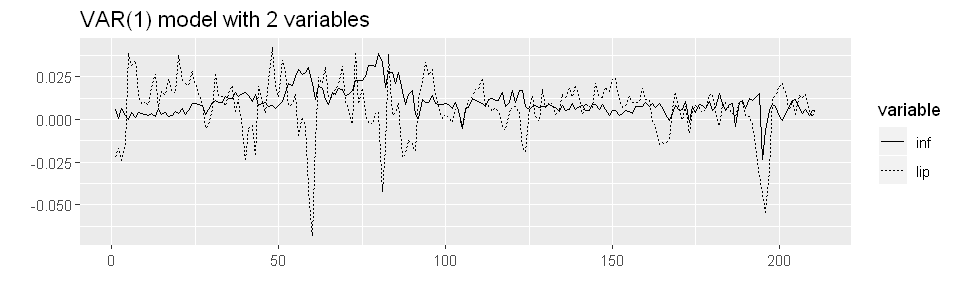

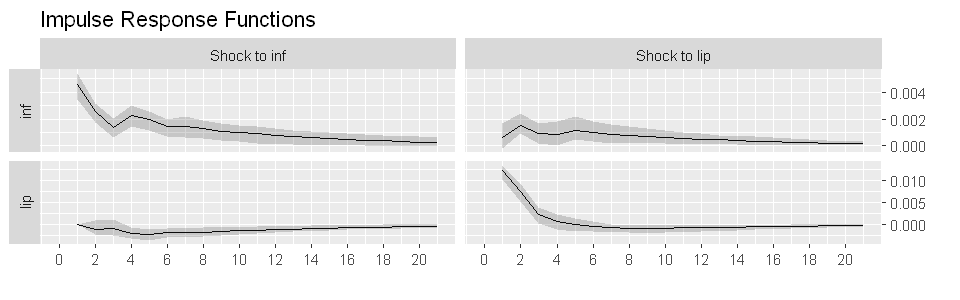

In [162]:
nsim <- length(inf)
m <- VAR(data, p = 3, type = "const")

psim <- as.data.frame(data)
psim$n <- c(1:nsim)
psim <- gather(psim, variable, value, -n)

p1 <- ggplot(psim, aes(n, value, linetype=variable)) + 
 geom_line() + 
 labs(title="VAR(1) model with 2 variables", x="", y="")

irfdata <- irf(m, nsteps = 12, n.ahead=20)
variables <- irfdata$irf %>% names

#### Function to extract IRF data ####
ir <- lapply(1:length(variables), function(e){
    data_to_plot <- data.frame(irfdata %>% `$`(irf) %>% `[[`(variables[e])) %>%
      mutate("t" = 1:NROW(.)) %>%
      gather(.,Variable, Value, -t)

    upper_ci <- data.frame(irfdata %>% `$`(Upper) %>% `[[`(variables[e])) %>%
      mutate("t" = 1:NROW(.)) %>%
      gather(.,Variable, Upper, -t)

    lower_ci <- data.frame(irfdata %>% `$`(Lower) %>% `[[`(variables[e]) ) %>%
      mutate("t" = 1:NROW(.)) %>%
      gather(.,Variable, Lower, -t)

    res <- inner_join(data_to_plot, upper_ci, c("t","Variable")) %>%
           inner_join(.,lower_ci, c("t","Variable")) %>%
           mutate(impulse = paste("Shock to", variables[e])) 
}) %>% bind_rows
######################################

p2 <- ggplot(ir, aes(x = t, y = Value, group = Variable))  +
  geom_line() +
  geom_ribbon(aes(x=t, ymax=Upper, ymin=Lower), alpha=0.2) +
  scale_x_continuous(limits = c(0,21), breaks = seq(0,20,2)) +
  scale_y_continuous("", position="right") +
  labs(title="Impulse Response Functions", x="") +
  facet_grid(Variable ~ impulse, scales="free", switch="y")

print(p1)
print(p2)

Now we use the Blanchard Quah decompsition by using the BQ() from the vars package

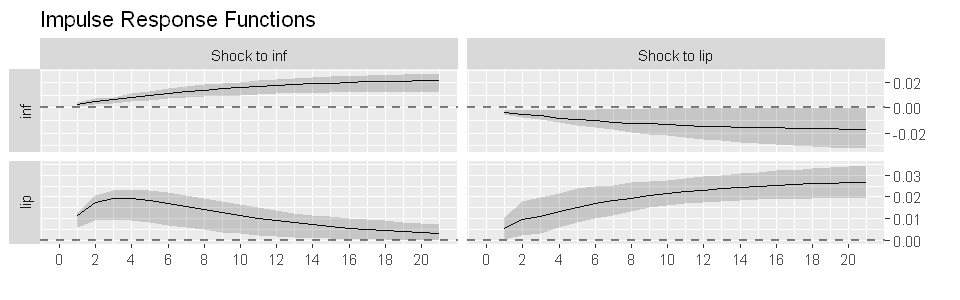

In [182]:
nsim <- length(inf)
m <- VAR(data, p = 3)
m <- BQ(m)

psim <- as.data.frame(data)
psim$n <- c(1:nsim)
psim <- gather(psim, variable, value, -n)

irfdata <- irf(m,cumulative=T,n.ahead=20)
variables <- irfdata$irf %>% names

#### Function to extract IRF data ####
ir <- lapply(1:length(variables), function(e){
    data_to_plot <- data.frame(irfdata %>% `$`(irf) %>% `[[`(variables[e])) %>%
      mutate("t" = 1:NROW(.)) %>%
      gather(.,Variable, Value, -t)

    upper_ci <- data.frame(irfdata %>% `$`(Upper) %>% `[[`(variables[e])) %>%
      mutate("t" = 1:NROW(.)) %>%
      gather(.,Variable, Upper, -t)

    lower_ci <- data.frame(irfdata %>% `$`(Lower) %>% `[[`(variables[e]) ) %>%
      mutate("t" = 1:NROW(.)) %>%
      gather(.,Variable, Lower, -t)

    res <- inner_join(data_to_plot, upper_ci, c("t","Variable")) %>%
           inner_join(.,lower_ci, c("t","Variable")) %>%
           mutate(impulse = paste("Shock to", variables[e])) 
}) %>% bind_rows
######################################

p2 <- ggplot(ir, aes(x = t, y = Value, group = Variable))  +
  geom_line() +
  geom_hline(yintercept=0, alpha=0.5, linetype="dashed", size=0.6) +
  geom_ribbon(aes(x=t, ymax=Upper, ymin=Lower), alpha=0.2) +
  scale_x_continuous(limits = c(0,21), breaks = seq(0,20,2)) +
  scale_y_continuous("", position="right") +
  labs(title="Impulse Response Functions", x="") +
  facet_grid(Variable ~ impulse, scales="free", switch="y")

print(p2)